# Week 3: Advanced Python Pandas

# Date Functionality in Pandas

In [1]:
import pandas as pd
import numpy as np

Pandas has four main time-related classes: `timestamp`, `datetime-index`, `period`, and `period-index`. Let's start with `timestamp.`

## Timestamp

Timestamp represents a single timestamp and associates values with points in time. 

In [2]:
pd.Timestamp('9/1/2016 10:05 AM')

Timestamp('2016-09-01 10:05:00')

`timestamp` is interchangeable with numpy's `datetime` in most cases. 

## Period

If we are interested in a span of time. Period represents a specific time span such as a specific day or month.

In [3]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [4]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

## DatetimeIndex

The index of a time stamp.

In [5]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [6]:
type(t1)

pandas.core.series.Series

In [7]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

## PeriodIndex

In [11]:
t2 = pd.Series(list('abc'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')]) 
t2

2016-09    a
2016-10    b
2016-11    c
Freq: M, dtype: object

In [9]:
type(t2)

pandas.core.series.Series

In [12]:
type(t2.index)

pandas.tseries.period.PeriodIndex

## Converting to `Datetime`

Create some random data with indices that are dates in different formats.

In [14]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10,100,(4,2)), index = d1, columns = list('ab'))
ts3

,a,b
2 June 2013,38,99
"Aug 29, 2014",77,48
2015-06-26,88,40
7/12/16,59,57


Use `pandas` to convert these to `datetime` objects with standard format.

In [15]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,38,99
2014-08-29,77,48
2015-06-26,88,40
2016-07-12,59,57


If we have European format, we can tell it to set the day to the first number. Notice that it sets the time to midnight- all zeros.

In [16]:
pd.to_datetime('4.7.12', dayfirst = True)

Timestamp('2012-07-04 00:00:00')

## Timedeltas

`Timedeltas` are differences in times.

In [17]:
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

We can also add time to a specific timestamp.

In [19]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

## Working with Dates in a DataFrame

Look at 9 measurements that were taken biweekly every Sunday starting in Oct. 2016. Use `date_range`.

In [20]:
dates = pd.date_range('10-01-2016', periods = 9, freq = '2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

Put these into a DataFrame with some random data.

In [21]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5,10,9).cumsum(),'Count 2': 120 + np.random.randint(-5,10,9)}, index = dates)
df

,Count 1,Count 2
2016-10-02,106,116
2016-10-16,114,119
2016-10-30,114,123
2016-11-13,110,123
2016-11-27,112,126
2016-12-11,118,122
2016-12-25,121,128
2017-01-08,118,115
2017-01-22,123,120


Let's verify that everything took place on a Sunday.

In [22]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

We can use `diff` to find the difference between each date's value (compared to the previous date's value).

In [23]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,8.0,3.0
2016-10-30,0.0,4.0
2016-11-13,-4.0,0.0
2016-11-27,2.0,3.0
2016-12-11,6.0,-4.0
2016-12-25,3.0,6.0
2017-01-08,-3.0,-13.0
2017-01-22,5.0,5.0


If we want to know the mean count for each month, use `resample.` It shows each month as the last date in that month.

In [25]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,111.333333,119.333333
2016-11-30,111.000000,124.500000
2016-12-31,119.500000,125.000000
2017-01-31,120.500000,117.500000


And we can select all of the events in a given period by providing that year or month.

In [26]:
df['2017']

,Count 1,Count 2
2017-01-08,118,115
2017-01-22,123,120


In [27]:
df['2016-10']

,Count 1,Count 2
2016-10-02,106,116
2016-10-16,114,119
2016-10-30,114,123


Or look for anything after a given date.

In [28]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,118,122
2016-12-25,121,128
2017-01-08,118,115
2017-01-22,123,120


We can change the frequency of our dates using `asfreq`. If we change the frequency from biweekly to weekly, we will end up with missing values. But we can forward fill, meaning that each empty value is filled with the most recent value. 

In [29]:
df.asfreq('W', method = 'ffill')

,Count 1,Count 2
2016-10-02,106,116
2016-10-09,106,116
2016-10-16,114,119
2016-10-23,114,119
2016-10-30,114,123
2016-11-06,114,123
2016-11-13,110,123
2016-11-20,110,123
2016-11-27,112,126
2016-12-04,112,126


## Plotting time series

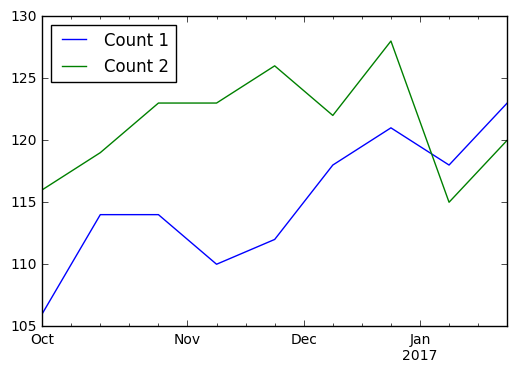

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()